In [3]:
from alpha.notebook import *
from alpha.strategies.upturn import UpTurn
from alpha.cli import mpscan

await init_notebook()

up = UpTurn()

In [4]:
def query(df, profit_range, a30m5=0.0005):
    filtered = df[(df.profit<profit_range[1]) & 
                  (df.profit>profit_range[0]) & 
                  (df.a30m5 > a30m5) & 
                  (df.v1d1>0) & 
                  (df.v1d2>0) &
                  (df.v1d3>0) &
                  (df.v30m1>0) &
                  (df.v30m2>0) &
                  (df.v30m3>0)
                 ]
    df_ = filtered.sort_values(by="a30m5", ascending=False)
    return df_.sort_values(by="profit")

In [5]:
tm = '2021-09-15 14:30'
await mpscan('UpTurn', tm, profit=0)

tm = tm.replace("-",'').replace(" ","_").replace(":","")[2:]
df = await up.load_cached_results(tm)
clear_output()

In [6]:
df = await up.load_cached_results("210915_1430")

2021-09-15 17:26:19,702 E 179131 alpha.plotting.candlestick:plot:135 | object of type 'NoneType' has no len()
Traceback (most recent call last):
  File "/conda/envs/alpha/lib/python3.8/site-packages/alpha/plotting/candlestick.py", line 133, in plot
    bars = await sec.load_bars(start, end, frame_type)
  File "/conda/envs/alpha/lib/python3.8/site-packages/omicron/models/security.py", line 254, in load_bars
    if len(bars) == 2 and bars[0]["frame"] == self._bars[-1]["frame"]:
TypeError: object of type 'NoneType' has no len()
2021-09-15 17:26:19,896 E 179131 alpha.plotting.candlestick:plot:135 | object of type 'NoneType' has no len()
Traceback (most recent call last):
  File "/conda/envs/alpha/lib/python3.8/site-packages/alpha/plotting/candlestick.py", line 133, in plot
    bars = await sec.load_bars(start, end, frame_type)
  File "/conda/envs/alpha/lib/python3.8/site-packages/omicron/models/security.py", line 254, in load_bars
    if len(bars) == 2 and bars[0]["frame"] == self._bars[-1

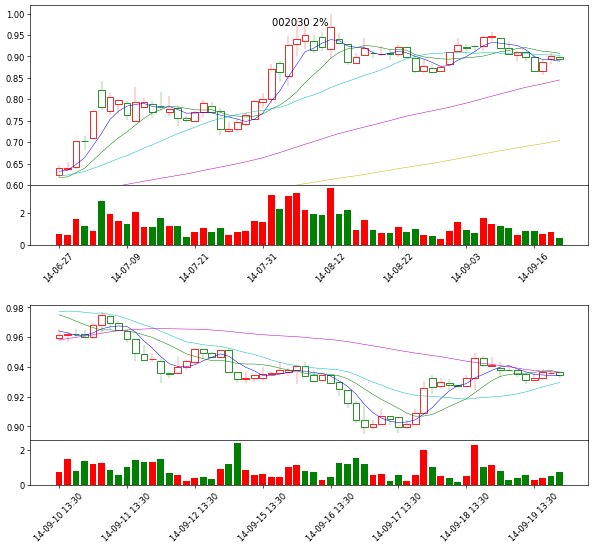

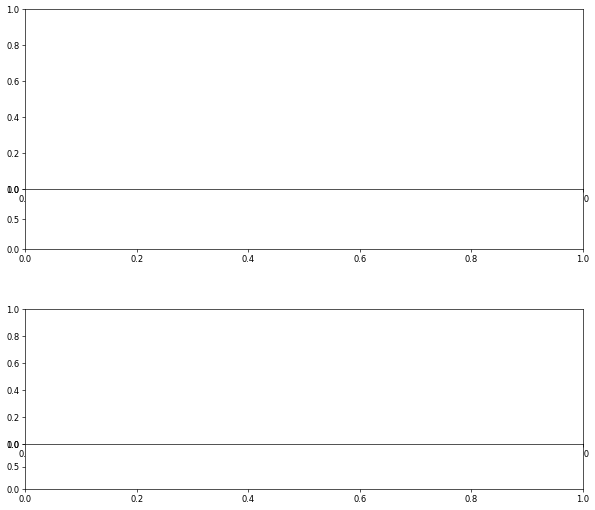

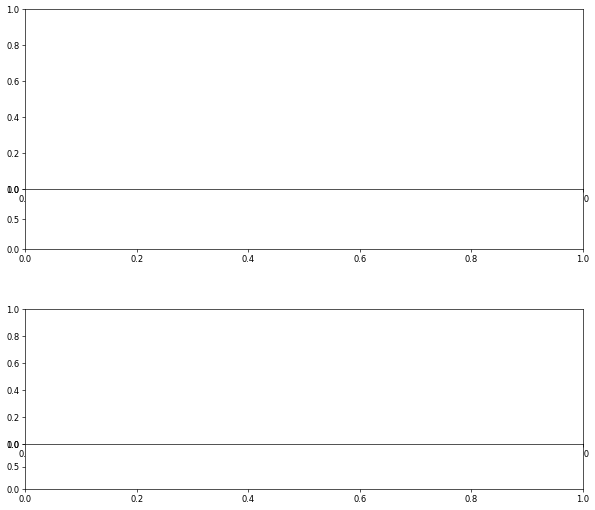

In [9]:
await up.plot(query(df, [0,0.1], a30m5=0), save_to="/tmp/up")

In [7]:
df

,code,name,time,profit,a30m5,b30m5,e30m5,a30m10,b30m10,e30m10,...,v1d1,v1d2,v1d3,rsi1d1,rsi1d2,rsi1d3,rsi1d4,rsi1d5,rh1d1,rh1d2
0,000002.XSHE,万科A,2015-09-21 14:30:00,0.016012,0.000277,-0.004427,0.000217,0.000179,-0.006389,0.000791,...,1.650579,-1.803928,-1.160067,37.506247,44.127749,63.877164,41.016866,33.925519,-1.0,-0.105666
1,000004.XSHE,国华网安,2015-09-21 14:30:00,0.046830,0.000706,-0.007131,0.000637,-0.000963,0.011638,0.001162,...,0.893477,2.049832,-2.346132,45.041308,37.704821,33.301559,68.734481,59.373729,-1.0,-0.049810
2,000017.XSHE,深中华A,2015-09-21 14:30:00,0.038988,0.000445,-0.003114,0.000447,0.000078,-0.002741,0.000339,...,1.349463,1.365814,-1.545980,70.763141,72.661427,60.815747,42.516997,42.516997,-1.0,-0.040100
3,000006.XSHE,深振业A,2015-09-21 14:30:00,0.027735,0.000297,-0.002674,0.000778,0.000075,-0.003133,0.000483,...,-1.339192,1.261640,-1.083323,81.425157,63.035498,72.847288,46.774332,42.832250,-1.0,-0.035052
4,000010.XSHE,美丽生态,2015-09-21 14:30:00,0.016380,0.000186,-0.001380,0.000235,0.000086,-0.001864,0.000235,...,1.164702,-1.439073,1.419448,69.080196,59.569145,74.382552,49.506653,51.918644,-1.0,-0.017995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,603505.XSHG,金石资源,2015-09-21 14:30:00,0.002792,0.000038,0.005736,0.000695,0.000462,-0.003681,0.000911,...,-1.220918,-1.212744,1.053676,78.093982,65.205524,74.384347,60.483817,71.133434,1.0,0.036982
2636,603489.XSHG,八方股份,2015-09-21 14:30:00,0.026603,0.000035,0.003394,0.000828,0.000192,-0.000514,0.000356,...,1.123893,1.260132,1.152145,84.936900,88.735681,88.757152,82.999664,87.524413,1.0,0.026698
2637,603500.XSHG,祥和实业,2015-09-21 14:30:00,0.038936,0.000470,-0.003636,0.000378,0.000090,-0.002901,0.000161,...,1.367302,1.466930,-1.150937,72.348486,55.100186,57.143633,46.898509,47.463615,-1.0,-0.043608
2638,603507.XSHG,振江股份,2015-09-21 14:30:00,0.259120,0.002529,-0.003051,0.001180,0.000488,-0.001772,0.001460,...,1.517237,-1.677237,-1.221974,51.581649,44.401835,58.907320,63.358471,72.134026,-1.0,-0.002809
